In [11]:
import time
import keyboard
import datetime
import numpy as np
import pandas as pd
import torch
from telemetry import TelemetryData

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from IPython.display import clear_output

import scienceplots

## Data collection

In [17]:
timestamps = np.array([])

x_coords = np.array([])
y_coords = np.array([])
z_coords = np.array([])

gears = np.array([])
speeds = np.array([])
headings = np.array([])

normalizedCarPositions = np.array([])
wheels_off_track = np.array([])
off_tracks = np.array([])

fl_slip_ratios = np.array([])
fr_slip_ratios = np.array([])
rl_slip_ratios = np.array([])
rr_slip_ratios = np.array([])

fl_wheel_slip = np.array([])
fr_wheel_slip = np.array([])
rl_wheel_slip = np.array([])
rr_wheel_slip = np.array([])

fl_wheel_slip = np.array([])
fr_wheel_slip = np.array([])
rl_wheel_slip = np.array([])
rr_wheel_slip = np.array([])

force_feedback = np.array([])

info = TelemetryData()

print("Collecting telemetry...")

while True:

    timestamps = np.append(timestamps, datetime.datetime.now())

    x, z, y = list(info.graphics.carCoordinates)
    x_coords = np.append(x_coords, x)
    y_coords = np.append(y_coords, -1*y)
    z_coords = np.append(z_coords, z)

    clear_output(wait=True)
    print("Car Coordinates")
    print(f"x: {x}\ty: {-1*y}\tz: {z}")

    gears = np.append(gears, info.physics.gear)
    speeds = np.append(speeds, info.physics.speedKmh)
    headings = np.append(headings, info.physics.heading)

    force_feedback = np.append(force_feedback, info.physics.finalFF)

    normalizedCarPositions = np.append(normalizedCarPositions, info.graphics.normalizedCarPosition)
    number_of_wheels_off_track = info.physics.numberOfTyresOut
    wheels_off_track = np.append(wheels_off_track, number_of_wheels_off_track)
    off_tracks = np.append(off_tracks, True if number_of_wheels_off_track >= 3 else False)

    fl, fr, rl, rr = list(info.physics.slipRatio)
    fl_slip_ratios = np.append(fl_slip_ratios, fl)
    fr_slip_ratios = np.append(fr_slip_ratios, fr)
    rl_slip_ratios = np.append(rl_slip_ratios, rl)
    rr_slip_ratios = np.append(rr_slip_ratios, rr)

    fl_sus, fr_sus, rl_sus, rr_sus = list(info.physics.suspensionTravel)
    fl_wheel_suspension = np.append(fl_wheel_suspension, fl_sus)
    fr_wheel_suspension = np.append(fr_wheel_suspension, fr_sus)
    rl_wheel_suspension = np.append(rl_wheel_suspension, rl_sus)
    rr_wheel_suspension = np.append(rr_wheel_suspension, rr_sus)


    if keyboard.is_pressed('q'):
        print("Stopped.")
        break

    time.sleep(0.1)

info.close()

Car Coordinates
x: -1420.81591796875	y: -2249.388427734375	z: 97.0804214477539
Stopped.


In [18]:
force_feedback[:10]

array([0.0005731 , 0.00065872, 0.00066526, 0.00059867, 0.00069545,
       0.00065914, 0.00059984, 0.00069816, 0.00063375, 0.00057792])

In [96]:
nord_df = pd.DataFrame({
    "timestamps": timestamps,
    "x_coords": x_coords,
    "y_coords": y_coords,
    "z_coords": z_coords,
    "gears": gears,
    "speeds": speeds,
    "headings": headings,
    "normalizedCarPositions": normalizedCarPositions,
    "wheels_off_track": wheels_off_track,
    "off_track": off_tracks,
    "fl_slip_ratios": fl_slip_ratios,
    "fr_slip_ratios": fr_slip_ratios,
    "rl_slip_ratios": rl_slip_ratios,
    "rr_slip_ratios": rr_slip_ratios,
    "fl_wheel_slip": fl_wheel_slip,
    "fr_wheel_slip": fr_wheel_slip,
    "rl_wheel_slip": rl_wheel_slip,
    "rr_wheel_slip": rr_wheel_slip
})
nord_df.to_csv("../data/nord.csv", index=False)
nord_df.to_excel(f"../data/nord_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx")

In [4]:
# nord_df = pd.read_excel("../data/nord_20230709_0303.xlsx")
# timestamps = nord_df["timestamps"].to_numpy()
# x_coords = nord_df["x_coords"].to_numpy()
# y_coords = nord_df["y_coords"].to_numpy()
# z_coords = nord_df["z_coords"].to_numpy()
# gears = nord_df["gears"].to_numpy()
# speeds = nord_df["speeds"].to_numpy()
# headings = nord_df["headings"].to_numpy()
# normalizedCarPositions = nord_df["normalizedCarPositions"].to_numpy()
# wheels_off_track = nord_df["wheels_off_track"].to_numpy()
# off_track = nord_df["off_track"].to_numpy()
# fl_slip_ratios = nord_df["fl_slip_ratios"].to_numpy()
# fr_slip_ratios = nord_df["fr_slip_ratios"].to_numpy()
# rl_slip_ratios = nord_df["rl_slip_ratios"].to_numpy()
# rr_slip_ratios = nord_df["rr_slip_ratios"].to_numpy()
# fl_wheel_slip = nord_df["fl_wheel_slip"].to_numpy()
# fr_wheel_slip = nord_df["fr_wheel_slip"].to_numpy()
# rl_wheel_slip = nord_df["rl_wheel_slip"].to_numpy()
# rr_wheel_slip = nord_df["rr_wheel_slip"].to_numpy()

## Plot Track 

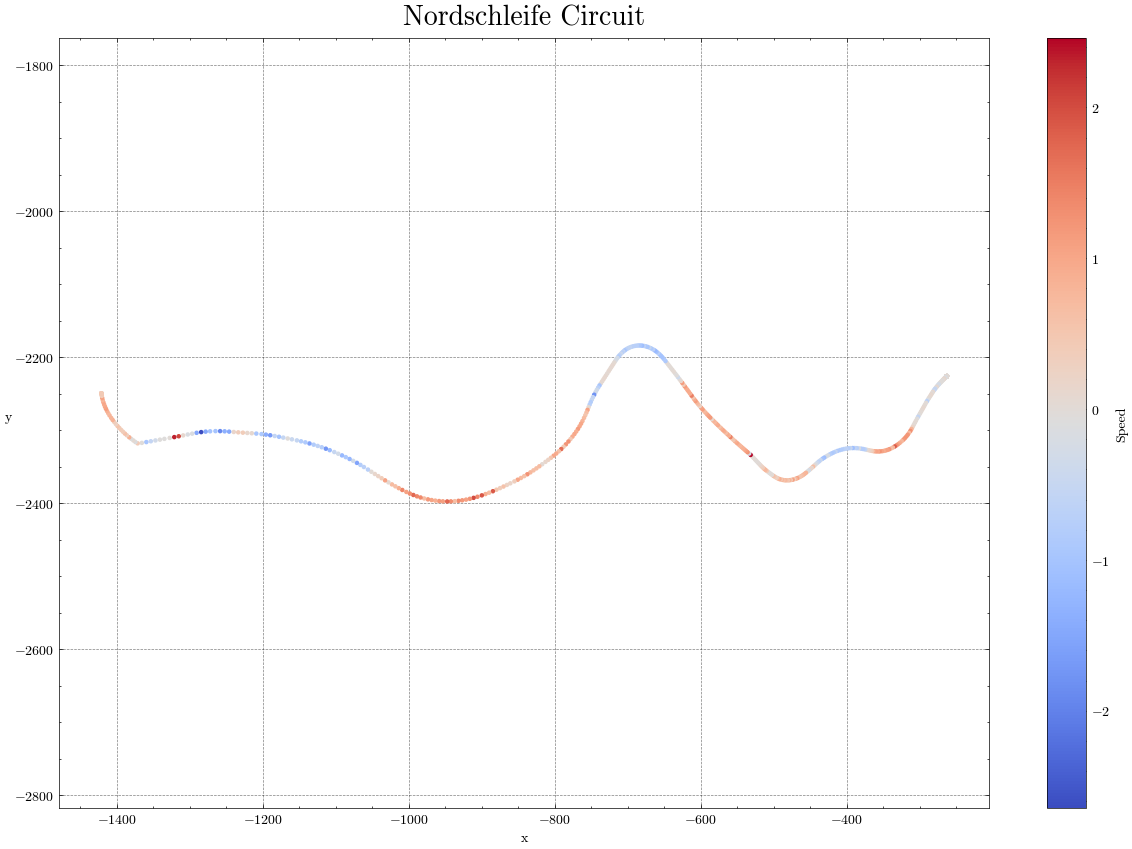

In [20]:
plt.style.use(['science'])

with plt.style.context(['science', 'grid', 'no-latex', 'high-vis']):
    fig, ax = plt.subplots(figsize=(15, 10))
    cmap = plt.colormaps["coolwarm"]
    ax.set_title("Nordschleife Circuit", fontsize=20, pad=10, fontweight='bold')
    sc = ax.scatter(x_coords, y_coords, c=force_feedback, cmap=cmap, s=5)
    ax.set_xlabel("x")
    ax.set_ylabel("y", rotation=0)
    cbar = fig.colorbar(sc, label="Speed")
    ax.axis('equal')
    plt.show()

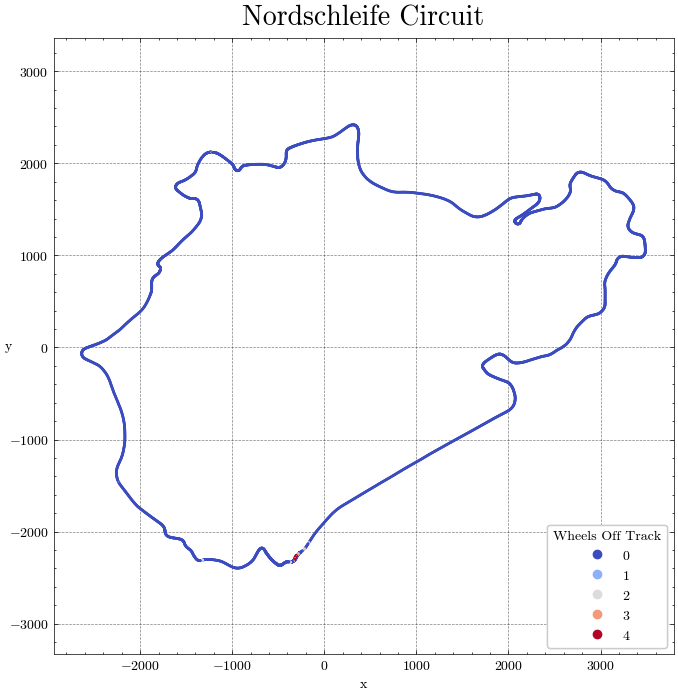

In [164]:
plt.style.use(['science'])

with plt.style.context(['science', 'grid', 'no-latex', 'high-vis']):
        
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Nordschleife Circuit", fontsize=20, pad=10)
    # plt.scatter(x_coords, y_coords, c=wheels_off_track, label=wheels_off_track ,cmap='viridis', s=1)
    scatter = ax.scatter(x_coords, y_coords, c=wheels_off_track, label=wheels_off_track ,cmap='coolwarm', s=1)
    legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Wheels Off Track")
    ax.add_artist(legend1)
    plt.xlabel("x")
    plt.ylabel("y", rotation=0, labelpad=0, va='center')
    plt.axis('equal')
    plt.show()

## Feature scaling

#### Car coordinates

In [41]:
# Minimum x coordinate
print(f"Min x: {np.min(x_coords)}")
print(f"Max x: {np.max(x_coords)}")
print(f"Min x: {np.min(y_coords)}")
print(f"Max x: {np.max(y_coords)}")

Min x: -2634.808837890625
Max x: 3486.23828125
Min x: -2396.3291015625
Max x: 2417.904296875


In [42]:
print("X Coordinates")
print(f"range = {(np.max(x_coords) - np.min(x_coords))}")

x_padding = (np.max(x_coords) - np.min(x_coords)) * 0.005

new_min_x = np.min(x_coords) - x_padding
new_max_x = np.max(x_coords) + x_padding
print(f"New min x: {new_min_x}")
print(f"New max x: {new_max_x}")

print("\nY Coordinates")
print(f"range = {(np.max(y_coords) - np.min(y_coords))}")

y_padding = (np.max(y_coords) - np.min(y_coords)) * 0.005

new_min_y = np.min(y_coords) - y_padding
new_max_y = np.max(y_coords) + y_padding
print(f"New min y: {new_min_y}")
print(f"New max y: {new_max_y}")

X Coordinates
range = 6121.047119140625
New min x: -2665.414073486328
New max x: 3516.843516845703

Y Coordinates
range = 4814.2333984375
New min y: -2420.4002685546875
New max y: 2441.9754638671875


In [4]:
df = pd.read_excel("../data/nord_20230720_015833.xlsx")
z_padding = (df.z_coords.max() - df.z_coords.min()) * 0.005
print(df.z_coords.max() + z_padding)
print(df.z_coords.min() - z_padding)

NameError: name 'pd' is not defined

In [43]:
# Normalize x coordinates
x_norm = (x_coords - new_min_x)/(new_max_x - new_min_x)
y_norm = (y_coords - new_min_y)/(new_max_y - new_min_y) 

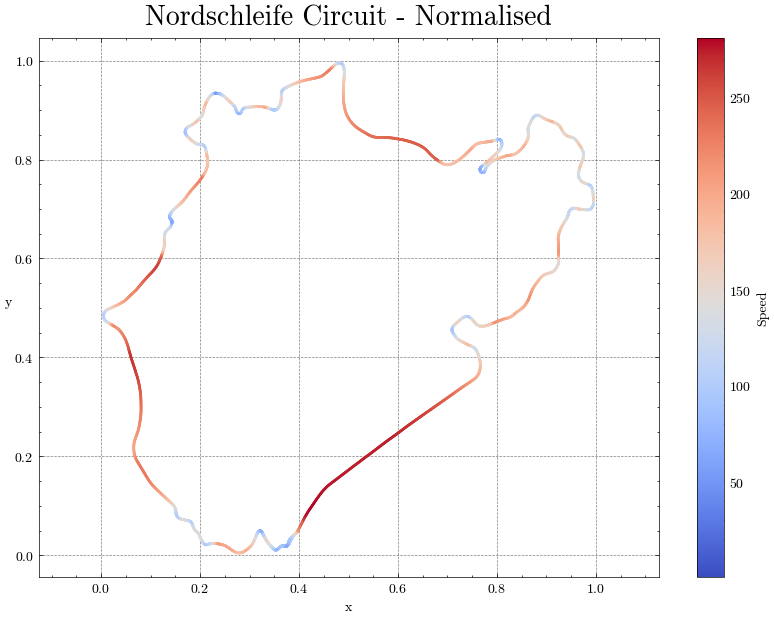

In [44]:
plt.style.use(['science'])

# Notice the track is now squashed into a square
with plt.style.context(['science', 'grid', 'no-latex', 'high-vis']):
    fig, ax = plt.subplots(figsize=(10, 7))
    cmap = plt.colormaps["coolwarm"]
    ax.set_title("Nordschleife Circuit - Normalised", fontsize=20, pad=10, fontweight='bold')
    sc = ax.scatter(x_norm, y_norm, c=speeds, cmap=cmap, s=1)
    ax.set_xlabel("x")
    ax.set_xlim(0, 1)
    ax.set_ylabel("y", rotation=0)
    ax.set_ylim(0, 1)
    cbar = fig.colorbar(sc, label="Speed")
    ax.axis('equal')
    plt.show()

#### Car speeds

<Axes: ylabel='Density'>

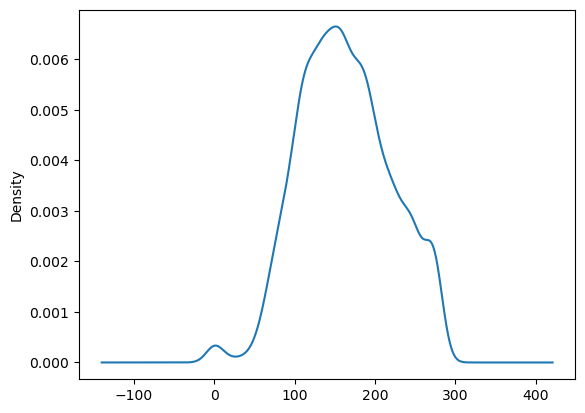

In [7]:
# plot bell curve of speeds
nord_df["speeds"].plot.kde()

In [8]:
nord_df["speeds"].describe()

count    4609.000000
mean      162.972307
std        56.699433
min         0.008669
25%       120.769363
50%       159.467270
75%       201.713486
max       280.564240
Name: speeds, dtype: float64

In [13]:
speeds

array([4.98112403e-02, 4.61549535e-02, 4.62190323e-02, ...,
       1.04919807e+02, 1.04919807e+02, 1.04919807e+02])

In [14]:
MAX_SPEED = 290
speeds = np.maximum(speeds, 0)

In [16]:
norm_speeds = speeds / MAX_SPEED

In [134]:
norm_speeds.min()

2.989188350480178e-05

In [19]:
norm_speeds.max()

0.9674628948343211

In [21]:
nord_df.head()

,timestamps,x_coords,y_coords,z_coords,gears,speeds,headings,normalizedCarPositions,wheels_off_track,off_track,fl_slip_ratios,fr_slip_ratios,rl_slip_ratios,rr_slip_ratios,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip,norm_speeds
0,2023-07-09 03:03:08.231248,-262.738708,-2225.668701,123.069824,1.0,0.049811,0.842379,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.102996,0.088228,0.239106,0.254044,0.000172
1,2023-07-09 03:03:08.334248,-262.737518,-2225.667480,123.069733,1.0,0.046155,0.842368,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.103624,0.087535,0.255270,0.261969,0.000159
2,2023-07-09 03:03:08.435248,-262.736542,-2225.666748,123.069664,1.0,0.046219,0.842359,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.103426,0.087822,0.241285,0.251464,0.000159
3,2023-07-09 03:03:08.537251,-262.735504,-2225.665771,123.069588,1.0,0.049841,0.842350,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.102861,0.088323,0.238836,0.254092,0.000172
4,2023-07-09 03:03:08.639272,-262.734528,-2225.664795,123.069511,1.0,0.048192,0.842341,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.102252,0.088941,0.224241,0.246388,0.000166


In [20]:
nord_df["norm_speeds"] = norm_speeds

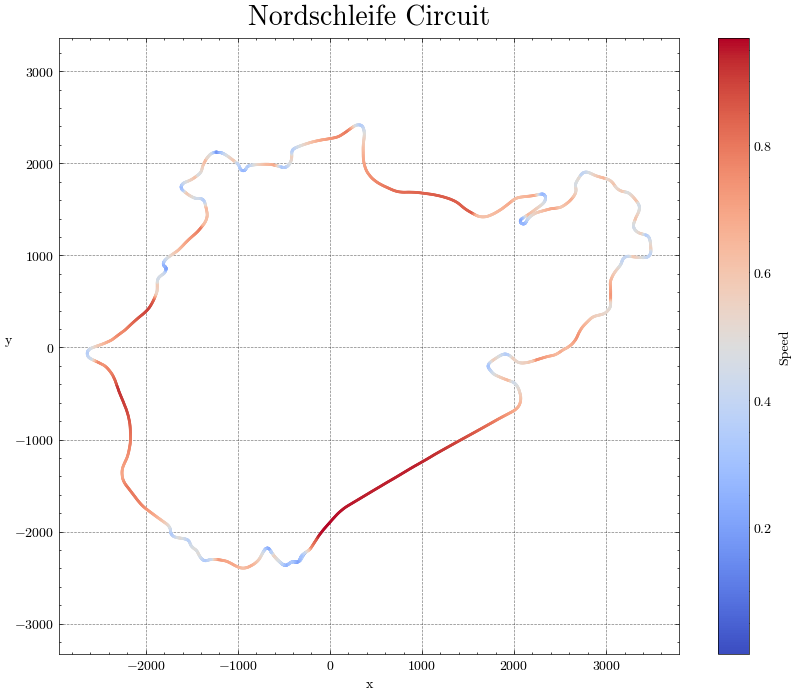

In [27]:
plt.style.use(['science'])

with plt.style.context(['science', 'grid', 'no-latex', 'high-vis']):
    fig, ax = plt.subplots(figsize=(10, 8))
    cmap = plt.colormaps["coolwarm"]
    ax.set_title("Nordschleife Circuit", fontsize=20, pad=10, fontweight='bold')
    sc = ax.scatter(x_coords, y_coords, c=norm_speeds, cmap=cmap, s=1)
    ax.set_xlabel("x")
    ax.set_ylabel("y", rotation=0)
    cbar = fig.colorbar(sc, label="Speed")
    ax.axis('equal')
    plt.show()

#### Car heading in radians

In [28]:
nord_df["headings"].describe()

count    4609.000000
mean       -0.039862
std         1.769783
min        -3.140656
25%        -1.719372
50%         0.149148
75%         1.284838
max         3.138167
Name: headings, dtype: float64

In [29]:
sin_headings = np.sin(headings)
cos_headings = np.cos(headings)
nord_df["sin_headings"] = sin_headings
nord_df["cos_headings"] = cos_headings

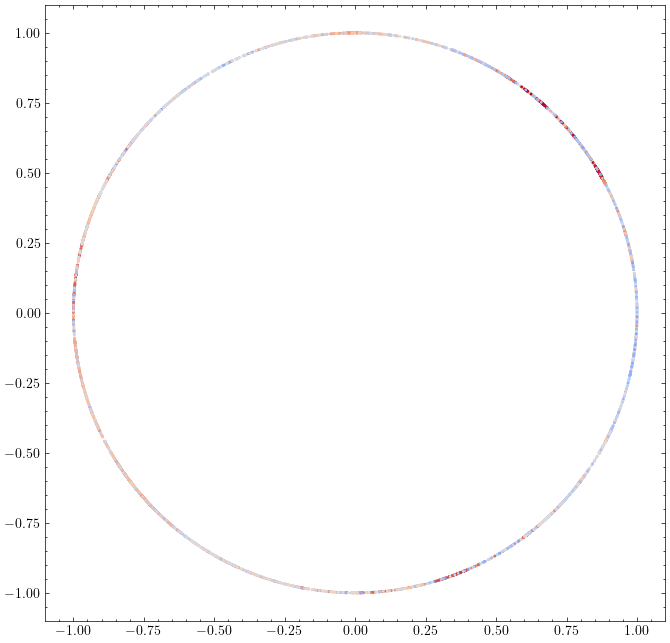

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(sin_headings, cos_headings, s=1, c=speeds, cmap='coolwarm')
plt.show()

In [37]:
sin_headings.min()

-0.9999995612938839

In [38]:
sin_headings.max()

0.9999986920798389

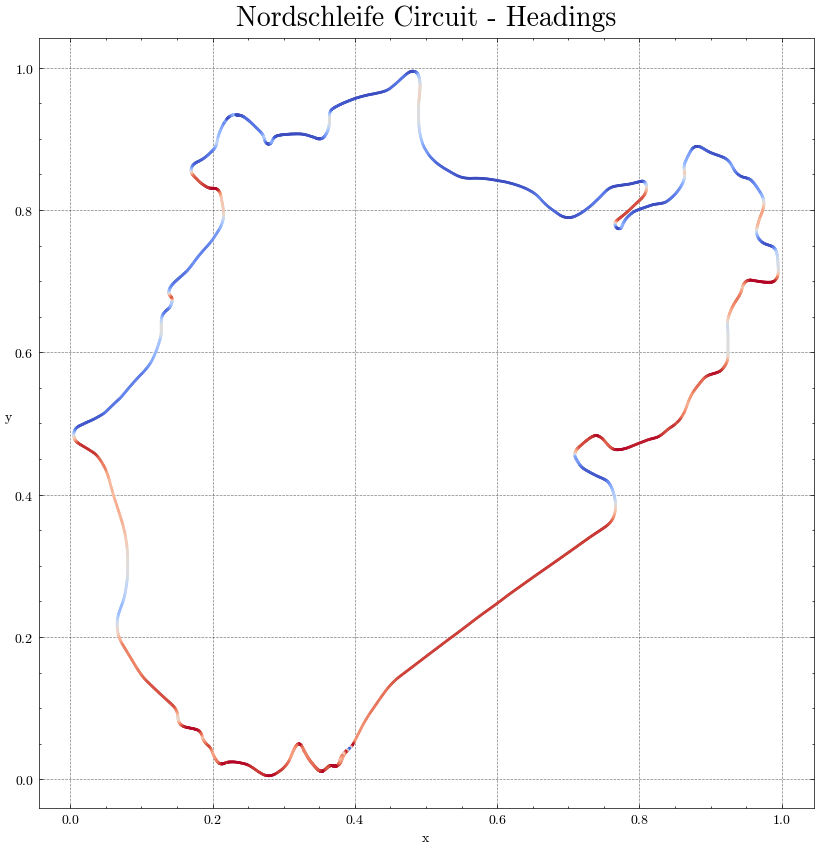

In [46]:
plt.style.use(['science'])

with plt.style.context(['science', 'grid', 'no-latex', 'high-vis']):
    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = plt.colormaps["coolwarm"]
    ax.set_title("Nordschleife Circuit - Headings", fontsize=20, pad=10, fontweight='bold')
    sc = ax.scatter(x_norm, y_norm, c=nord_df["sin_headings"], cmap=cmap, s=1)
    ax.set_xlabel("x")
    ax.set_xlim(0, 1)
    ax.set_ylabel("y", rotation=0)
    ax.set_ylim(0, 1)
    # cbar = fig.colorbar(sc, label="Heading")
    ax.axis('equal')
    plt.show()

### Tyre Slip

In [49]:
nord_df.head(1).T

,0
timestamps,2023-07-09 03:03:08.231248
x_coords,-262.738708
y_coords,-2225.668701
z_coords,123.069824
gears,1.0
speeds,0.049811
headings,0.842379
normalizedCarPositions,0.984545
wheels_off_track,0.0
off_track,0.0


In [54]:
cols = [
    "timestamps", 
    "normalizedCarPositions", 
    "speeds", 
    "fl_slip_ratios", 
    "fr_slip_ratios", 
    "rl_slip_ratios", 
    "rr_slip_ratios", 
    "fl_wheel_slip", 
    "fr_wheel_slip", 
    "rl_wheel_slip",
    "rr_wheel_slip"
    ]

In [56]:
nord_df.loc[:, cols].head()

,timestamps,normalizedCarPositions,speeds,fl_slip_ratios,fr_slip_ratios,rl_slip_ratios,rr_slip_ratios,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip
0,2023-07-09 03:03:08.231248,0.984545,0.049811,0.0,0.0,1.261169e-41,0.0,0.102996,0.088228,0.239106,0.254044
1,2023-07-09 03:03:08.334248,0.984545,0.046155,0.0,0.0,1.261169e-41,0.0,0.103624,0.087535,0.255270,0.261969
2,2023-07-09 03:03:08.435248,0.984545,0.046219,0.0,0.0,1.261169e-41,0.0,0.103426,0.087822,0.241285,0.251464
3,2023-07-09 03:03:08.537251,0.984545,0.049841,0.0,0.0,1.261169e-41,0.0,0.102861,0.088323,0.238836,0.254092
4,2023-07-09 03:03:08.639272,0.984545,0.048192,0.0,0.0,1.261169e-41,0.0,0.102252,0.088941,0.224241,0.246388


In [58]:
nord_df.index

RangeIndex(start=0, stop=4609, step=1)

In [91]:
start_line = nord_df.loc[(nord_df.index < 2000) & (nord_df["normalizedCarPositions"] < 0.9), cols].index[0]
finish_line = nord_df.loc[(nord_df.index > 2000) & (nord_df["normalizedCarPositions"] > 0.5), cols].index[-1] + 1

In [93]:
lap_df = nord_df.iloc[start_line:finish_line].reset_index(drop=True)

In [94]:
lap_df

,timestamps,x_coords,y_coords,z_coords,gears,speeds,headings,normalizedCarPositions,wheels_off_track,off_track,...,fr_slip_ratios,rl_slip_ratios,rr_slip_ratios,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip,norm_speeds,sin_headings,cos_headings
0,2023-07-09 03:03:25.589468,-516.242615,-2351.061523,139.799347,3.0,103.661629,2.225022,9.538068e-07,0.0,0.0,...,0.0,1.261169e-41,0.0,0.080986,0.041244,0.326150,0.315495,0.357454,0.793520,-0.608545
1,2023-07-09 03:03:25.690469,-518.527039,-2349.322754,139.901230,3.0,105.612679,2.226387,1.399468e-04,0.0,0.0,...,0.0,1.261169e-41,0.0,0.080595,0.045299,0.345964,0.339457,0.364182,0.792688,-0.609627
2,2023-07-09 03:03:25.792468,-521.274719,-2347.215088,140.022491,3.0,107.716713,2.226842,3.076663e-04,0.0,0.0,...,0.0,1.261169e-41,0.0,0.060337,0.051686,0.242310,0.241231,0.371437,0.792410,-0.609988
3,2023-07-09 03:03:25.894466,-523.643127,-2345.393311,140.132172,3.0,109.620049,2.227038,4.522455e-04,0.0,0.0,...,0.0,1.261169e-41,0.0,0.062878,0.054761,0.306556,0.306970,0.378000,0.792291,-0.610143
4,2023-07-09 03:03:25.996380,-526.125854,-2343.481934,140.252655,3.0,111.653740,2.227305,6.036935e-04,0.0,0.0,...,0.0,1.261169e-41,0.0,0.059770,0.054095,0.232125,0.232167,0.385013,0.792128,-0.610355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,2023-07-09 03:10:51.164159,-506.900391,-2359.668701,139.353317,3.0,89.735817,2.082251,9.993809e-01,0.0,0.0,...,0.0,1.261169e-41,0.0,0.474990,0.355048,0.520452,0.774438,0.309434,0.872033,-0.489447
4375,2023-07-09 03:10:51.266156,-509.455444,-2358.207275,139.447418,3.0,91.680443,2.139977,9.995208e-01,0.0,0.0,...,0.0,1.261169e-41,0.0,0.280954,0.000000,0.511153,0.590715,0.316139,0.842343,-0.538942
4376,2023-07-09 03:10:51.368157,-511.672363,-2356.800537,139.544296,3.0,93.563438,2.169352,9.996427e-01,0.0,0.0,...,0.0,1.261169e-41,0.0,0.236405,0.122000,0.421893,0.486937,0.322633,0.826150,-0.563450
4377,2023-07-09 03:10:51.470157,-513.822693,-2355.337646,139.642746,3.0,95.631020,2.191371,9.997657e-01,0.0,0.0,...,0.0,1.261169e-41,0.0,0.285568,0.180124,0.310573,0.338747,0.329762,0.813544,-0.581503


In [110]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [103]:
nord_df.head()

,timestamps,x_coords,y_coords,z_coords,gears,speeds,headings,normalizedCarPositions,wheels_off_track,off_track,fl_slip_ratios,fr_slip_ratios,rl_slip_ratios,rr_slip_ratios,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip,norm_speeds,sin_headings,cos_headings
0,2023-07-09 03:03:08.231248,-262.738708,-2225.668701,123.069824,1.0,0.049811,0.842379,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.102996,0.088228,0.239106,0.254044,0.000172,0.746229,0.665689
1,2023-07-09 03:03:08.334248,-262.737518,-2225.667480,123.069733,1.0,0.046155,0.842368,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.103624,0.087535,0.255270,0.261969,0.000159,0.746221,0.665698
2,2023-07-09 03:03:08.435248,-262.736542,-2225.666748,123.069664,1.0,0.046219,0.842359,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.103426,0.087822,0.241285,0.251464,0.000159,0.746216,0.665704
3,2023-07-09 03:03:08.537251,-262.735504,-2225.665771,123.069588,1.0,0.049841,0.842350,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.102861,0.088323,0.238836,0.254092,0.000172,0.746210,0.665711
4,2023-07-09 03:03:08.639272,-262.734528,-2225.664795,123.069511,1.0,0.048192,0.842341,0.984545,0.0,0.0,0.0,0.0,1.261169e-41,0.0,0.102252,0.088941,0.224241,0.246388,0.000166,0.746204,0.665718


In [114]:
# Tyre starts to slip at index 35 until index 50
nord_df.loc[30:60, cols]

,timestamps,normalizedCarPositions,speeds,fl_slip_ratios,fr_slip_ratios,rl_slip_ratios,rr_slip_ratios,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip
30,2023-07-09 03:03:11.280073,0.984544,0.009974,0.0,0.0,1.261169e-41,0.0,0.068851,0.058290,0.069367,0.070170
31,2023-07-09 03:03:11.381073,0.984544,0.009590,0.0,0.0,1.261169e-41,0.0,0.069663,0.059536,0.069483,0.071173
32,2023-07-09 03:03:11.482097,0.984544,0.009390,0.0,0.0,1.261169e-41,0.0,0.068022,0.062530,0.067463,0.073520
33,2023-07-09 03:03:11.583106,0.984544,0.009011,0.0,0.0,1.261169e-41,0.0,0.068075,0.064033,0.066836,0.074079
34,2023-07-09 03:03:11.685094,0.984544,0.008669,0.0,0.0,1.261169e-41,0.0,0.068905,0.064324,0.067093,0.073612
35,2023-07-09 03:03:11.786414,0.984544,0.862359,0.0,0.0,1.261169e-41,0.0,0.088550,0.010183,3.617498,3.619297
36,2023-07-09 03:03:11.888438,0.984546,3.765508,0.0,0.0,1.261169e-41,0.0,0.068732,0.093211,29.034063,24.083258
37,2023-07-09 03:03:11.989438,0.984552,6.171436,0.0,0.0,1.261169e-41,0.0,0.025825,0.019203,90.387390,91.035004
38,2023-07-09 03:03:12.090442,0.984565,8.726999,0.0,0.0,1.261169e-41,0.0,0.051813,0.039736,76.992714,79.285873
39,2023-07-09 03:03:12.191438,0.984576,11.123791,0.0,0.0,1.261169e-41,0.0,0.059188,0.051282,59.795540,62.003845


In [131]:
nord_df[["fl_wheel_slip","fr_wheel_slip","rl_wheel_slip","rr_wheel_slip"]].describe()

,fl_wheel_slip,fr_wheel_slip,rl_wheel_slip,rr_wheel_slip
count,4609.000000,4609.000000,4609.000000,4609.000000
mean,0.637490,0.823874,0.600232,0.802076
std,1.859950,11.230336,2.978877,11.770770
min,0.000000,0.000000,0.000000,0.000000
25%,0.065460,0.056357,0.159237,0.161371
50%,0.157165,0.157368,0.244108,0.249254
75%,0.504490,0.500906,0.419665,0.413441
max,64.445869,755.275024,90.387390,745.654114


<Axes: >

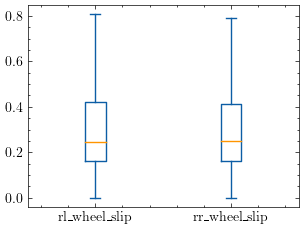

In [127]:
nord_df[["rl_wheel_slip","rr_wheel_slip"]].plot.box(showfliers=False)

<Axes: >

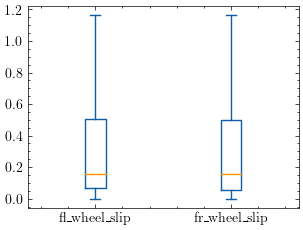

In [128]:
nord_df[["fl_wheel_slip","fr_wheel_slip"]].plot.box(showfliers =False)

Even with the extreme values on the right-hand side tyres, there is enough evidence to suggest these are outliers.  
These will be normalised and merged.

In [136]:
rl_wheel_slip.min()

0.0

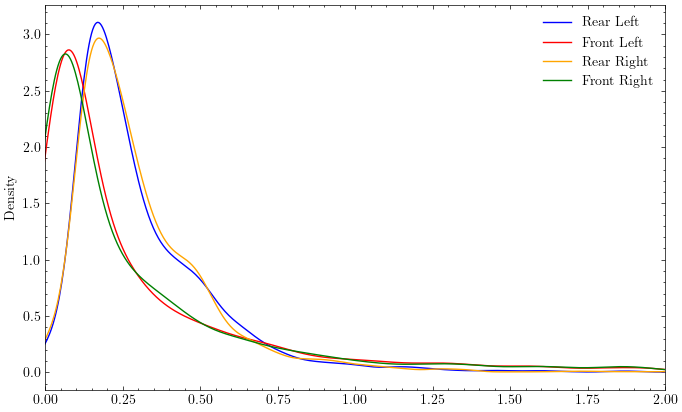

In [183]:
plt.figure(figsize=(8, 5))
pd.Series(rl_wheel_slip[rl_wheel_slip<2]).plot.kde(color='blue', label="Rear Left")
pd.Series(fl_wheel_slip[fl_wheel_slip<2]).plot.kde(color='red', label="Front Left")
pd.Series(rr_wheel_slip[rr_wheel_slip<2]).plot.kde(color='orange', label="Rear Right")
pd.Series(fr_wheel_slip[fr_wheel_slip<2]).plot.kde(color='green', label="Front Right")
plt.xlim(0, 2)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(fl_wheel_slip[rl_wheel_slip<2], bins=100)
plt.show()

In [202]:
test1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
test2 = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])

np.mean([test1, test2], axis=0)

array([5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [190]:
norm_fr = np.clip(fr_wheel_slip, 0, 1.2) / 1.2
norm_fl = np.clip(fl_wheel_slip, 0, 1.2) / 1.2
norm_rr = np.clip(rr_wheel_slip, 0, 0.8) / 0.8
norm_rl = np.clip(rl_wheel_slip, 0, 0.8) / 0.8

In [203]:
front_wheel_slip = np.mean([norm_fl, norm_fr], axis=0)
rear_wheel_slip = np.mean([norm_rl, norm_rr], axis=0)

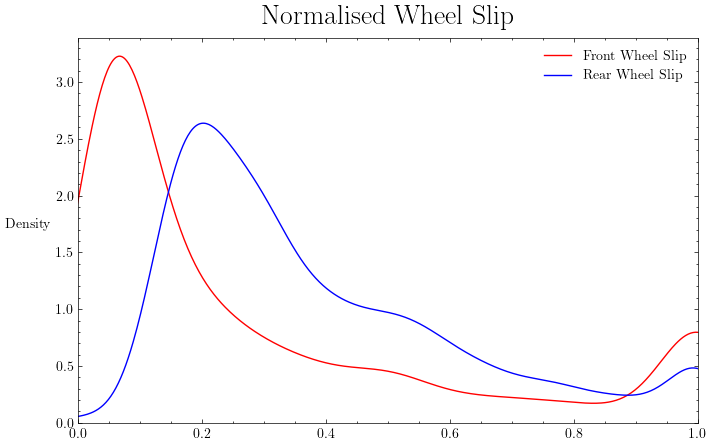

In [204]:
plt.figure(figsize=(8, 5))
plt.title("Normalised Wheel Slip", fontsize=20, pad=10, fontweight='bold')
pd.Series(front_wheel_slip).plot.kde(color='red', label="Front Wheel Slip")
pd.Series(rear_wheel_slip).plot.kde(color='blue', label="Rear Wheel Slip")
plt.ylabel("Density", rotation=0, labelpad=20)
plt.xlim(0, 1)
plt.ylim(0)
plt.legend()
plt.show()

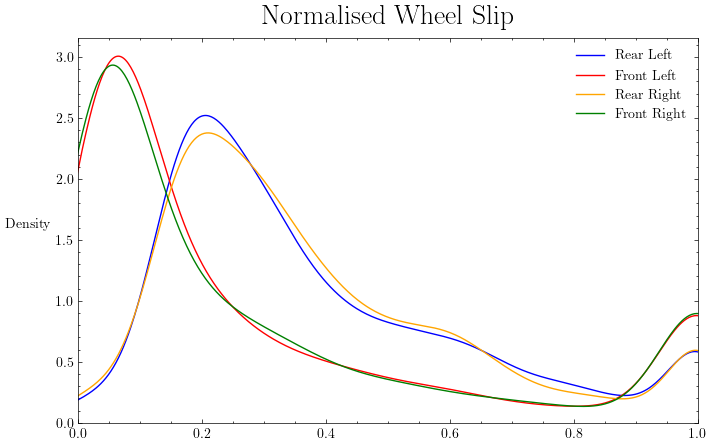

In [200]:
plt.figure(figsize=(8, 5))
plt.title("Normalised Wheel Slip", fontsize=20, pad=10, fontweight='bold')
pd.Series(norm_rl).plot.kde(color='blue', label="Rear Left")
pd.Series(norm_fl).plot.kde(color='red', label="Front Left")
pd.Series(norm_rr).plot.kde(color='orange', label="Rear Right")
pd.Series(norm_fr).plot.kde(color='green', label="Front Right")
plt.ylabel("Density", rotation=0, labelpad=20)
plt.xlim(0, 1)
plt.ylim(0)
plt.legend()
plt.show()

In [139]:
np.minimum(np.maximum(rl_wheel_slip, 0),0.8)

array([0.23910555, 0.25526956, 0.24128456, ..., 0.8       , 0.8       ,
       0.8       ])

***

In [ ]:
info = TelemetryData()

print(list(info.graphics.carCoordinates))
print(list(info.graphics.car))

info.close()

In [ ]:
info = TelemetryData()

while True:

    clear_output(wait=True)

    # x, z, y = list(info.graphics.carCoordinates)

    print(info.graphics.carCoordinates)

    # print("Car Coordinates")
    # print(f"x: {x}\ty: {-1*y}\tz: {z}")

    if keyboard.is_pressed('q'):
        print("Stopping loop.")
        break

    time.sleep(0.1)

info.close()

***
## Number of wheels off track

In [9]:
pd.Series(wheels_off_track).value_counts().sort_index()

0    4533
1      13
2      30
3       8
4      25
Name: count, dtype: int64

In [20]:
wheels_off_track.shape

(4609,)

In [15]:
wheels_off_track_tensor = torch.from_numpy(wheels_off_track)

In [17]:
wheels_off_track_one_hot = torch.nn.functional.one_hot(wheels_off_track_tensor, num_classes=5)
wheels_off_track_one_hot

tensor([[1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        ...,
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0]])

In [19]:
wheels_off_track_one_hot.shape

torch.Size([4609, 5])

In [21]:
# testing one hot encoding always encodes in same order
test = torch.tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
test_one_hot = torch.nn.functional.one_hot(test, num_classes=5)
test_one_hot

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

In [22]:
test2 = torch.tensor([4, 3, 2, 1, 0, 4, 3, 2, 1, 0])
test2_one_hot = torch.nn.functional.one_hot(test2, num_classes=5)
test2_one_hot

tensor([[0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0]])

In [ ]:
# Good! It does encode in the same order